Load data

In [76]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib

df=pd.read_csv('delaney_solubility_with_descriptors.csv')
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


Split data into input and output 

In [77]:
X=df.drop(columns=['logS'])
Y=df['logS']

Data preparation

Split the Data into Training/Test Sets

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
1051,2.41960,246.306,0.0,0.000000
175,1.65930,116.204,2.0,0.000000
198,2.41380,106.596,1.0,0.000000
832,4.84010,344.495,1.0,0.000000
81,1.94910,116.204,5.0,0.000000
...,...,...,...,...
1033,3.52752,322.290,1.0,0.521739
763,0.56780,88.106,2.0,0.000000
835,2.71412,365.842,2.0,0.500000
559,6.49018,505.206,6.0,0.428571


Create the Model

Linear regression

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Train the Model

In [80]:
model.fit(X_train,Y_train)

LinearRegression()

Save the Model

In [81]:
joblib.dump(model,'delaney_solubility.joblib')

['delaney_solubility.joblib']

Load the model from disk

In [82]:
model=joblib.load('delaney_solubility.joblib')

Make Predictions

Apply the model to the train set

In [83]:
y_lr_train_model = model.predict(X_train)
y_lr_test_model = model.predict(X_test)

In [84]:
y_lr_train_model

array([-3.21342338e+00, -1.73218656e+00, -2.23292849e+00, -5.62579047e+00,
       -1.88678084e+00,  1.07857744e+00, -1.11631983e+00, -2.01121061e+00,
       -2.96930825e+00, -1.76314400e+00, -2.09069614e+00, -3.91238575e+00,
       -4.63409195e+00, -3.91631734e+00, -8.47571046e-01, -2.71591573e+00,
       -3.31867327e+00, -5.29968588e+00, -1.92317160e+00, -4.55236081e+00,
       -1.84917347e+00, -2.67630206e+00, -1.45737356e+00, -6.62515054e+00,
       -1.76068887e+00, -3.16069776e+00, -3.14495014e+00, -2.46118148e+00,
       -1.12748853e+00, -3.21827208e+00, -2.78352943e+00, -3.76282246e+00,
       -6.13353443e+00, -4.97788126e+00, -4.97788126e+00, -5.44786051e+00,
       -1.36504813e+00, -4.48162707e+00, -3.07540645e+00, -2.09518871e+00,
       -1.73513954e+00, -3.53174817e+00, -2.91465990e+00, -3.99459105e+00,
       -1.85833837e+00, -1.84917347e+00,  5.84923094e-01, -4.29143470e+00,
       -1.89321737e+00, -2.02876088e+00, -3.03015789e+00, -4.26206440e+00,
       -1.87026060e+00, -

In [85]:
y_lr_test_model

array([-6.41144928, -4.97788126, -2.57085841, -0.03093276, -7.75056517,
       -4.27168704, -4.59108516, -2.34826294, -3.7355082 , -1.4399089 ,
       -3.01237143, -3.4766317 , -3.65511154, -1.21906804, -2.31367899,
       -3.31495041, -4.62953546, -2.3090898 , -0.52792829, -3.23796627,
       -4.13721675, -2.72044544, -4.59108516, -3.03015789, -2.38418296,
       -2.28929842, -3.09010458, -5.06795793, -1.86223109, -5.1978992 ,
       -1.47775759, -1.10493836, -1.9231716 , -2.95448802, -2.62844116,
       -4.40817235, -2.09518871, -1.7526042 , -1.31995208, -3.10916159,
       -2.37945851, -3.50903679, -2.55561795, -0.76664606, -1.35683241,
       -3.542743  , -3.55957191, -3.21854633, -0.54271722, -0.90489307,
       -3.37288735, -4.25669061, -2.32972195, -2.3478006 , -3.26374559,
       -1.59524321, -4.04219576, -2.19683713, -2.64130989, -1.32993829,
       -1.40680071, -2.8242033 , -4.34856277, -7.23301274, -3.38819227,
       -6.00032273, -7.23926977, -4.01660997, -3.72038638, -5.78

Evaluate performance and Improve the Model

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(Y_train, y_lr_train_model)
lr_train_r2 = r2_score(Y_train, y_lr_train_model)

lr_test_mse = mean_squared_error(Y_test, y_lr_test_model)
lr_test_r2 = r2_score(Y_test, y_lr_test_model)

In [87]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.009472241515891
LR R2 (Train):  0.7692295963594564
LR MSE (Test):  1.0221891674104262
LR R2 (Test):  0.7707918869245227


In [89]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [90]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.009472,0.76923,1.022189,0.770792


Random Forest


Training the model


In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

Applying the model to make a prediction


In [94]:
y_rf_train_model = rf.predict(X_train)
y_rf_test_model = rf.predict(X_test)

Evaluate model performance


In [95]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(Y_train, y_rf_train_model)
rf_train_r2 = r2_score(Y_train, y_rf_train_model)

rf_test_mse = mean_squared_error(Y_test, y_rf_test_model)
rf_test_r2 = r2_score(Y_test, y_rf_test_model)

In [96]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.058095,0.758114,1.025582,0.770031


Model comparison


In [98]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.009472,0.76923,1.022189,0.770792
0,Random forest,1.058095,0.758114,1.025582,0.770031


In [99]:
df_models.reset_index(drop=True)


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.009472,0.76923,1.022189,0.770792
1,Random forest,1.058095,0.758114,1.025582,0.770031


Data visualization of prediction results


Text(0.5, 0, 'Experimental LogS')

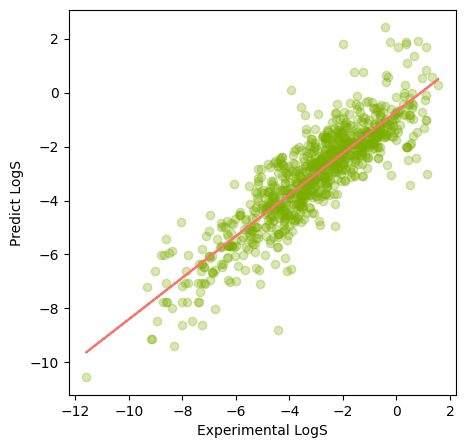

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=y_lr_train_model, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(Y_train, y_lr_train_model, 1)
p = np.poly1d(z)

plt.plot(Y_train, p(Y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
